
# Projeto 3 - Speed Dating


In [55]:
#importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
 



  ##### O primeiro passo, foi procurar um dataset ideal para trabalharmos, ou seja, que contenha dados o suficiente para chegar em uma conclusão. 
#####   Encontramos ele no OpenML.

In [60]:
data_suja_completa=pd.read_csv("speeddating.csv")

C:\Users\julia\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (3,10,11,15,16,17,18,19,39,40,41,42,43,44,51,52,53,54,55,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,107,109) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


##### Nosso objetivo é classificar, a partir dos dados já existentes no Dataset, se um casal vai dar "Match" ou não, para isso, escolhemos colunas com dados mais relevantes para tal objetivo, colunas como "wave", foi retirada, já que conta em qual rodada o casal esta e no nosso "Speed Dating" não vão ter rodadas.  

In [100]:
data_suja_limpo=data_suja_completa[data_suja_completa!= "?" ]
data_suja_limpo.dropna(inplace=True)
data_suja_limpo.columns
data=data_suja_limpo.drop(['d_pref_o_funny' ,'d_pref_o_ambitious',
                     'd_pref_o_shared_interests','d_pref_o_sincere', 'd_pref_o_intelligence',
                     "wave",'d_pref_o_attractive',"has_null","d_age",'d_importance_same_race',
                     'd_importance_same_religion',"samerace", "d_d_age", "expected_happy_with_sd_people", 
                     "expected_num_interested_in_me", "expected_num_matches", "guess_prob_liked", "decision", 
                     "decision_o", 'd_attractive_o',
 'd_sinsere_o' ,'d_intelligence_o' ,'d_funny_o', 'd_ambitous_o',
 'd_shared_interests_o', 'd_attractive_important' ,'d_sincere_important' ,'d_intellicence_important',
 'd_funny_important', 'd_ambtition_important',
 'd_shared_interests_important', 'd_attractive', 'd_sincere',
 'd_intelligence', 'd_funny' ,'d_ambition', 'd_attractive_partner' ,'d_sincere_partner',
 'd_intelligence_partner', 'd_funny_partner', 'd_ambition_partner',
 'd_shared_interests_partner', 'd_sports', 'd_tvsports',
 'd_exercise' ,'d_dining' ,'d_museums', 'd_art' ,'d_hiking', 'd_gaming',
 'd_clubbing' ,'d_reading', 'd_tv' ,'d_theater' ,'d_movies' ,'d_concerts',
 'd_music', 'd_shopping', 'd_yoga', 'd_interests_correlate' ,'d_expected_happy_with_sd_people',
 'd_expected_num_interested_in_me', 'd_expected_num_matches',
 'd_like', 'd_guess_prob_liked'], axis=1)
data.head()


,gender,age,age_o,race,race_o,importance_same_race,importance_same_religion,field,pref_o_attractive,pref_o_sincere,...,theater,movies,concerts,music,shopping,yoga,interests_correlate,like,met,match
0,female,21,27,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,2,4,Law,35,20,...,1,10,10,9,8,1,0.14,7,0,0
1,female,21,22,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,2,4,Law,60,0,...,1,10,10,9,8,1,0.54,7,1,0
3,female,21,23,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,2,4,Law,30,5,...,1,10,10,9,8,1,0.61,7,0,1
4,female,21,24,'Asian/Pacific Islander/Asian-American','Latino/Hispanic American',2,4,Law,30,10,...,1,10,10,9,8,1,0.21,6,0,1
5,female,21,25,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,2,4,Law,50,0,...,1,10,10,9,8,1,0.25,6,0,0


In [121]:
#mudando de string para int
data.age = data.age.astype(int)
data.age_o = data.age_o.astype(int)
data.match  = data.match.astype(int)
data.exercise = data.exercise.astype(int)
data.interests_correlate = data.interests_correlate.astype(float)
data.pref_o_attractive = data.pref_o_attractive.astype(float)
data.pref_o_sincere = data.pref_o_sincere.astype(float)
data.pref_o_intelligence = data.pref_o_intelligence.astype(float)
data.pref_o_funny = data.pref_o_funny.astype(float)
data.pref_o_ambitious = data.pref_o_ambitious.astype(float)
data.attractive = data.pref_o_attractive.astype(float)
data.sincere = data.pref_o_sincere.astype(float)
data.intelligence = data.pref_o_intelligence.astype(float)
data.funny = data.pref_o_funny.astype(float)
data.ambitious = data.pref_o_ambitious.astype(float)

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048 entries, 0 to 1843
Data columns (total 58 columns):
gender                        1048 non-null object
age                           1048 non-null int32
age_o                         1048 non-null int32
race                          1048 non-null object
race_o                        1048 non-null object
importance_same_race          1048 non-null object
importance_same_religion      1048 non-null object
field                         1048 non-null object
pref_o_attractive             1048 non-null float64
pref_o_sincere                1048 non-null float64
pref_o_intelligence           1048 non-null float64
pref_o_funny                  1048 non-null float64
pref_o_ambitious              1048 non-null float64
pref_o_shared_interests       1048 non-null object
attractive_o                  1048 non-null object
sinsere_o                     1048 non-null object
intelligence_o                1048 non-null object
funny_o                

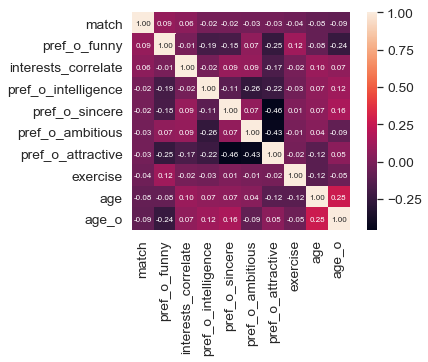

In [141]:

#sns.regplot(data.interests_correlate.value_counts(),data.match.value_counts(), color=('red'))


cols = data.corr().nlargest(k, 'match')['match'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()



In [ ]:
grafico=data.match.value_counts()
grafico.plot(kind='pie', colors=('pink', 'gold'), autopct="%0.2f",legend=False)

In [ ]:
# labels=['data.pref_o_attractive', 'data.pref_o_ambitious', 'data.pref_o_funny', 'data.pref_o_intelligence', 'data.pref_o_sincere']
# markers = [0, 1, 2, 3, 4, 5]
# str_markers = ["0", "1", "2", "3", "4", "5"]

# def make_radar_chart(name, stats, attribute_labels = labels, plot_markers = markers, plot_str_markers = str_markers):

#     labels = np.array(attribute_labels)

#     angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
#     stats = np.concatenate((stats,[stats[0]]))
#     angles = np.concatenate((angles,[angles[0]]))

#     fig= plt.figure()
#     ax = fig.add_subplot(111, polar=True)
#     ax.plot(angles, stats, 'o-', linewidth=2)
#     ax.fill(angles, stats, alpha=0.25)
#     ax.set_thetagrids(angles * 180/np.pi, labels)
#     plt.yticks(markers)
#     ax.set_title(name)
#     ax.grid(True)

#     fig.savefig("static/images/%s.png" % name)

# return plt.show()

# make_radar_chart("Agni", [2,3,4,4,5])

 
# Set data
df = pd.DataFrame({

})
 
 
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group A")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))


##### Para achar nossa acuracia, usamos a técnica de random forest

In [85]:
X_num = data[['age', "age_o", 'importance_same_race',
 'importance_same_religion',  'pref_o_attractive', 'pref_o_sincere',
 'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious',
 'pref_o_shared_interests',  'attractive_o' ,'sinsere_o' ,'intelligence_o',
 'funny_o' ,'ambitous_o', 'shared_interests_o' ,'attractive_important', 'sincere_important' ,'intellicence_important' ,'funny_important',
 'ambtition_important' ,'shared_interests_important' ,'attractive', 'sincere',
 'intelligence' ,'funny' ,'ambition' ,'attractive_partner', 'sincere_partner',
 'intelligence_partner', 'funny_partner' ,'ambition_partner',
 'shared_interests_partner', 'sports', 'tvsports' ,'exercise', 'dining',
 'museums', 'art' ,'hiking' ,'gaming' ,'clubbing', 'reading', 'tv' ,'theater',
 'movies' ,'concerts', 'music' ,'shopping' ,'yoga', 
 'like'  
]]
X_cat = data[['gender', 'race', "race_o", 'field', 'met'  ]]
#o resultado que queremos obter no final do "teste"
y = data['match']

In [87]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

X_cat_encoded = encoder.fit_transform(X_cat)

In [88]:
encoder.categories_

[array(['female', 'male'], dtype=object),
 array(["'Asian/Pacific Islander/Asian-American'",
        "'Black/African American'", "'Latino/Hispanic American'",
        'European/Caucasian-American', 'Other'], dtype=object),
 array(["'Asian/Pacific Islander/Asian-American'",
        "'Black/African American'", "'Latino/Hispanic American'",
        'European/Caucasian-American', 'Other'], dtype=object),
 array(["'Applied Maths/Econs'", "'Art History/medicine'",
        "'Biomedical Engineering'", "'Business & International Affairs'",
        "'Business [MBA]'", "'Business- MBA'", "'Computer Science'",
        "'Economics and Political Science'", "'Economics; Sociology'",
        "'Educational Psychology'", "'Electrical Engineering'",
        "'Elementary/Childhood Education [MA]'", "'German Literature'",
        "'International Educational Development'",
        "'Masters in Public Administration'", "'Masters of Social Work'",
        "'Mathematical Finance'", "'Mechanical Engineering'",


In [89]:
X_cat_encoded.toarray()[0]

array([1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0.])

In [90]:
X_num_array = X_num.values

In [91]:
X_cat_encoded_array = X_cat_encoded.toarray()

In [92]:
X = np.concatenate((X_num_array, X_cat_encoded_array), axis=1)

In [93]:
X[0]

array(['21', '27', '2', '4', '35', '20', '20', '20', '0', '5', '6', '8',
       '8', '8', '8', '6', '15', '20', '20', '15', '15', '15', '6', '8',
       '8', '8', '7', '6', '9', '7', '7', '6', '5', '9', '2', '8', '9',
       '1', '1', '5', '1', '5', '6', '9', '1', '10', '10', '9', '8', '1',
       '7', 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], dtype=object)

In [94]:
y[0]

0

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.8282442748091603


C:\Users\julia\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [99]:
novo_dado = ["female", 18, 18,'Latino/Hispanic American', 'Latino/Hispanic American','Engineering', 80, 100, 80, 60, 70, 100, 100, 100, 100, 100, 100, 60, 100, 70, 70, 70, 80, 6, 8, 7, 5, 7, 8, 9, 7.5, 9, 8, 6, 0, 8, 10, 5, 7, 0, 7, 0, 6, 10, 6, 10, 8, 10, 8, 3, 10, 1]  
novo_x_num = np.array([novo_dado[0]]).reshape(-1,1)
novo_x_cat = [novo_dado[1:]]
novo_x_num
novo_x_cat

[[18,
  18,
  'Latino/Hispanic American',
  'Latino/Hispanic American',
  'Engineering',
  80,
  100,
  80,
  60,
  70,
  100,
  100,
  100,
  100,
  100,
  100,
  60,
  100,
  70,
  70,
  70,
  80,
  6,
  8,
  7,
  5,
  7,
  8,
  9,
  7.5,
  9,
  8,
  6,
  0,
  8,
  10,
  5,
  7,
  0,
  7,
  0,
  6,
  10,
  6,
  10,
  8,
  10,
  8,
  3,
  10,
  1]]